<a href="https://colab.research.google.com/github/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/blob/main/PI_4_Predicao_Valores_Imoveis_SJC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregando dados do arquivo "price_versions.zip"

In [2]:
import pandas as pd
  
url_dados = 'https://github.com/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/blob/main/dados/new-price_versions.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,listing_id,price,price_monthly_condo_fee,price_rental_total,price_yearly_iptu,scraped_at
0,332687,2513233975,1400,471,0,52,2021-04-23 05:00:01.015793+00
1,332727,2517326136,2800,320,0,57,2021-04-23 05:00:17.721471+00
2,332767,2516892648,1900,635,0,0,2021-04-23 05:00:34.659799+00
3,332807,2517463901,1300,390,0,0,2021-04-23 05:00:50.954843+00
4,332847,2517054725,900,403,0,0,2021-04-23 05:01:06.874916+00
...,...,...,...,...,...,...,...
2745975,336766,2495377212,16000,2000,0,0,2021-04-24 05:09:12.992558+00
2745976,336806,2490859640,1800,730,0,0,2021-04-24 05:09:28.764087+00
2745977,336846,2517588087,3000,350,0,500,2021-04-24 05:09:54.776579+00
2745978,336886,2516740767,5200,690,0,0,2021-04-24 05:10:10.501659+00


## Carregando dados do arquivo "listings.zip"

In [3]:
url_dados2 = 'https://github.com/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/blob/main/dados/new-listings.zip?raw=true'
dados2 = pd.read_csv(url_dados2,compression='zip')
dados2

<ipython-input-3-38832b203b67>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dados2 = pd.read_csv(url_dados2,compression='zip')


,id,resource_id,provider_id,advertiser_id,address_country,address_state,address_city,address_neighborhood,address_street_number,address_street,...,price_monthly_condo_fee,price_rental_total,price_yearly_iptu,publication_type,listing_status,listing_type,created_at,updated_at,raw_data,scraped_at
0,923833,2539419421,61529.0,8132d7f5-ac6e-8229-ac29-66e53d55fe1e,BR,São Paulo,São José dos Campos,Jardim das Indústrias,NaN,NaN,...,482,0,155,STANDARD,NaN,USED,2021-10-28 01:43:54.123+00,2021-10-28 01:43:56.883+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-10-28 05:07:15.43542+00
1,1336880,2549894537,10048.0,5edc5203-b48b-1278-0e4b-36b4bf556daf,BR,São Paulo,São José dos Campos,Jardim América,NaN,Rua Andorra,...,290,0,0,STANDARD,NaN,USED,2022-02-01 19:01:11.276+00,2022-02-01 19:01:21.341+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-02-02 05:08:59.620765+00
2,1134517,2546641936,60384.0,ef34904e-bd8d-66bd-cd90-e3f966a6bf3b,BR,São Paulo,São José dos Campos,Jardim São Dimas,NaN,Avenida Doutor Adhemar de Barros,...,750,0,0,STANDARD,NaN,USED,2022-01-04 07:22:09.019+00,2022-01-28 11:21:26.848+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-01-05 05:07:37.423878+00
3,1107421,2546130088,NaN,5c45578a-2454-7af7-162e-b80754623bbb,BR,São Paulo,São José dos Campos,Jardim Satélite,NaN,Rua Polar,...,238,0,0,STANDARD,NaN,USED,2021-12-27 20:52:57.74+00,2022-01-10 13:07:26.754+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-12-28 05:10:28.48205+00
4,1536013,2557422239,46200.0,1404e2f2-c083-a256-152f-81c087dacf2e,BR,São Paulo,São José dos Campos,Jardim Augusta,NaN,NaN,...,390,0,59,STANDARD,NaN,USED,2022-04-06 01:16:39.038+00,2022-04-06 01:19:49.16+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-04-06 05:06:23.146788+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60964,1072808,2545119128,63537.0,fae8f98b-2c16-bdef-d2b2-e611a3718473,BR,São Paulo,São José dos Campos,Jardim Oswaldo Cruz,22,Rua Siria,...,0,0,0,STANDARD,NaN,USED,2021-12-18 01:41:44.46+00,2021-12-24 01:52:36.69+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-12-18 05:20:19.721142+00
60965,1039824,2543951968,56902.0,8e0b76b5-76ce-cdc7-c9ea-74b9347f68cc,BR,São Paulo,São José dos Campos,Vila Tesouro,NaN,NaN,...,250,0,35,STANDARD,NaN,USED,2021-12-08 14:27:38.954+00,2021-12-08 14:27:40.143+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-12-09 05:02:21.780106+00
60966,976422,2541504617,46200.0,1404e2f2-c083-a256-152f-81c087dacf2e,BR,São Paulo,São José dos Campos,Jardim Esplanada II,NaN,NaN,...,1050,0,242,STANDARD,NaN,USED,2021-11-17 00:50:43.138+00,2022-03-30 01:06:23.812+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-11-17 05:03:38.813772+00
60967,1015032,2542940581,51630.0,72cd5fe0-8473-589b-e305-8aff89ad70f9,BR,São Paulo,São José dos Campos,Jardim Alvorada,101,Avenida Cassiano Ricardo,...,811,0,1800,STANDARD,NaN,USED,2021-11-30 06:16:54.109+00,2021-12-08 10:55:32.824+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-12-01 05:05:35.393929+00


# Visualizar todas as colunas para identificar todos os atributos disponíveis e filtrá-los.

In [4]:
pd.set_option('display.max_columns',None)
dados2

,id,resource_id,provider_id,advertiser_id,address_country,address_state,address_city,address_neighborhood,address_street_number,address_street,address_unit_number,address_zipcode,latitude,longitude,title,description,unit_type,amenities,bathrooms,bedrooms,suites,parking_spaces,total_area,usable_area,price,price_monthly_condo_fee,price_rental_total,price_yearly_iptu,publication_type,listing_status,listing_type,created_at,updated_at,raw_data,scraped_at
0,923833,2539419421,61529.0,8132d7f5-ac6e-8229-ac29-66e53d55fe1e,BR,São Paulo,São José dos Campos,Jardim das Indústrias,NaN,NaN,NaN,12241200.0,NaN,NaN,Excelente apartamento para alugar de 2 dormitó...,Excelente Apartamento no Splendor Garden - Jd....,0,"[""POOL"", ""BARBECUE_GRILL"", ""ELEVATOR"", ""SERVIC...",2,2,0,2.0,100,0,3000,482,0,155,STANDARD,NaN,USED,2021-10-28 01:43:54.123+00,2021-10-28 01:43:56.883+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-10-28 05:07:15.43542+00
1,1336880,2549894537,10048.0,5edc5203-b48b-1278-0e4b-36b4bf556daf,BR,São Paulo,São José dos Campos,Jardim América,NaN,Rua Andorra,NaN,12235050.0,NaN,NaN,Apartamento locação Jardim América!!! Spazio C...,Apartamento no Jardim América - Localização es...,0,[],2,3,1,1.0,64,0,1800,290,0,0,STANDARD,NaN,USED,2022-02-01 19:01:11.276+00,2022-02-01 19:01:21.341+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-02-02 05:08:59.620765+00
2,1134517,2546641936,60384.0,ef34904e-bd8d-66bd-cd90-e3f966a6bf3b,BR,São Paulo,São José dos Campos,Jardim São Dimas,NaN,Avenida Doutor Adhemar de Barros,NaN,12245011.0,NaN,NaN,Apartamento Vila Adyana em frente ao Parque Sa...,"118 m2, <br>3 quartos, sendo 1 suíte, <br>Sala...",0,"[""POOL"", ""BARBECUE_GRILL""]",3,3,1,1.0,118,0,2500,750,0,0,STANDARD,NaN,USED,2022-01-04 07:22:09.019+00,2022-01-28 11:21:26.848+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-01-05 05:07:37.423878+00
3,1107421,2546130088,NaN,5c45578a-2454-7af7-162e-b80754623bbb,BR,São Paulo,São José dos Campos,Jardim Satélite,NaN,Rua Polar,NaN,12230240.0,NaN,NaN,Apartamento para aluguel tem 48 metros quadrad...,Conheça as características deste lindo apartam...,0,[],1,2,0,1.0,0,0,950,238,0,0,STANDARD,NaN,USED,2021-12-27 20:52:57.74+00,2022-01-10 13:07:26.754+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-12-28 05:10:28.48205+00
4,1536013,2557422239,46200.0,1404e2f2-c083-a256-152f-81c087dacf2e,BR,São Paulo,São José dos Campos,Jardim Augusta,NaN,NaN,NaN,12216510.0,NaN,NaN,"Apartamento com 2 dormitórios para alugar, 63 ...",Apartamento no Citta Di Roma<br><br>Contendo:<...,0,"[""POOL"", ""BARBECUE_GRILL"", ""ELEVATOR"", ""GATED_...",1,2,1,1.0,63,0,1728,390,0,59,STANDARD,NaN,USED,2022-04-06 01:16:39.038+00,2022-04-06 01:19:49.16+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-04-06 05:06:23.146788+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60964,1072808,2545119128,63537.0,fae8f98b-2c16-bdef-d2b2-e611a3718473,BR,São Paulo,São José dos Campos,Jardim Oswaldo Cruz,22,Rua Siria,NaN,12216530.0,NaN,NaN,Apartamento Mobiliado próx. Center Vale,2 dormitórios com armários - 55m2<br>1 banheir...,0,"[""FURNISHED""]",1,2,0,1.0,55,0,2500,0,0,0,STANDARD,NaN,USED,2021-12-18 01:41:44.46+00,2021-12-24 01:52:36.69+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-12-18 05:20:19.721142+00
60965,1039824,2543951968,56902.0,8e0b76b5-76ce-cdc7-c9ea-74b9347f68cc,BR,São Paulo,São José dos Campos,Vila Tesouro,NaN,NaN,NaN,12221520.0,NaN,NaN,"LOCAÇÃO APARTAMENTO 2 DORMITÓRIOS, 1 VAGA- VIL...",Apartamento com 47 m2 <br><br>2 dormitórios<br...,0,"[""KITCHEN"", ""GARAGE"", ""GATED_COMMUNITY""]",1,2,0,1.0,47,0,750,250,0,35,STANDARD,NaN,USED,2021-12-08 14:27:38.954+00,2021-12-08 14:27:40.143+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-12-09 05:02:21.780106+00
60966,976422,2541504617,46200.0,1404e2f2-c0

# Eliminando colunas que não serão úteis na análise dos dados.

In [5]:
dados_filtrados = dados2.drop(columns=["advertiser_id","address_country","address_state","address_city","title","description","unit_type","amenities","usable_area","price_rental_total","publication_type","listing_status","listing_type","created_at","updated_at","raw_data","scraped_at","address_street_number","address_unit_number"])

In [6]:
dados_filtrados

,id,resource_id,provider_id,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
0,923833,2539419421,61529.0,Jardim das Indústrias,NaN,12241200.0,NaN,NaN,2,2,0,2.0,100,3000,482,155
1,1336880,2549894537,10048.0,Jardim América,Rua Andorra,12235050.0,NaN,NaN,2,3,1,1.0,64,1800,290,0
2,1134517,2546641936,60384.0,Jardim São Dimas,Avenida Doutor Adhemar de Barros,12245011.0,NaN,NaN,3,3,1,1.0,118,2500,750,0
3,1107421,2546130088,NaN,Jardim Satélite,Rua Polar,12230240.0,NaN,NaN,1,2,0,1.0,0,950,238,0
4,1536013,2557422239,46200.0,Jardim Augusta,NaN,12216510.0,NaN,NaN,1,2,1,1.0,63,1728,390,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60964,1072808,2545119128,63537.0,Jardim Oswaldo Cruz,Rua Siria,12216530.0,NaN,NaN,1,2,0,1.0,55,2500,0,0
60965,1039824,2543951968,56902.0,Vila Tesouro,NaN,12221520.0,NaN,NaN,1,2,0,1.0,47,750,250,35
60966,976422,2541504617,46200.0,Jardim Esplanada II,NaN,12242840.0,NaN,NaN,6,4,4,3.0,190,8200,1050,242
60967,1015032,2542940581,51630.0,Jardim Alvorada,Avenida Cassiano Ricardo,12240540.0,NaN,NaN,5,3,3,3.0,157,4900,811,1800


# Ordenando os imóveis pelo bairro, pela rua e número de quartos.

In [13]:
dados_filt_ord = dados_filtrados.sort_values(['address_neighborhood','address_street','bedrooms'])
dados_filt_ord

,id,resource_id,provider_id,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
55389,822476,2535142476,57907.0,Alto da Ponte,Avenida Rui Barbosa,12212531.0,NaN,NaN,1,1,0,0.0,45,880,0,0
24752,1922116,2570630050,NaN,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12213900.0,NaN,NaN,1,2,0,1.0,62,1130,0,120
26841,2142981,2577575348,19502.0,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12212510.0,NaN,NaN,1,2,0,1.0,62,900,400,43
60283,2303605,2582308530,NaN,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12212510.0,NaN,NaN,1,2,1,NaN,52,1100,0,0
5015,736397,2531007502,20172.0,Alto da Ponte,NaN,12212510.0,NaN,NaN,1,2,0,1.0,54,600,373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57205,777496,2533416550,50259.0,Vila das Flores,Rua Maria Pires da Silva,12234758.0,NaN,NaN,1,2,0,1.0,64,1100,100,0
21274,2279239,2581462727,1943.0,Área Rural de Caçapava,NaN,12299899.0,NaN,NaN,1,2,0,1.0,140,980,240,50
43237,161142,2509639563,13909.0,NaN,NaN,12250000.0,NaN,NaN,1,2,0,1.0,52,700,255,0
45120,277568,2513602599,7942.0,NaN,NaN,12250000.0,NaN,NaN,1,2,0,1.0,52,648,321,0


Cálculo da moda, ou seja, do valor em maior frequência no número de quartos dos imóveis listados:

In [16]:
import numpy as np

dados_filt_ord['bedrooms'].mode()

0    2
Name: bedrooms, dtype: int64

Cálculo da variância no número de quartos da amostra:

In [17]:
dados_filt_ord['bedrooms'].var()

0.7050124938568928

# Histograma relativo ao número de quartos dos imóveis.

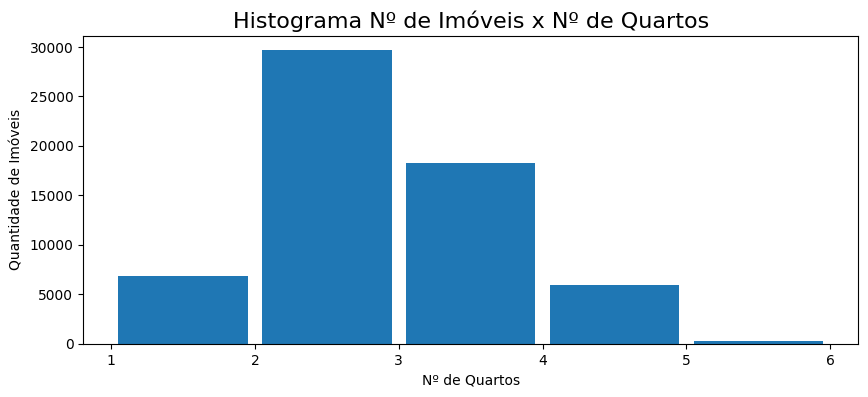

In [25]:
import matplotlib.pyplot as plt

quartos = dados_filt_ord['bedrooms']

plt.figure(figsize=(10,4))
plt.hist(quartos,rwidth=0.9 , bins = range(1,7,1))
plt.title('Histograma Nº de Imóveis x Nº de Quartos', fontsize=16)
plt.xlabel('Nº de Quartos')
plt.ylabel('Quantidade de Imóveis')
plt.show()


# Contando a quantidade de imóveis em cada bairro:

In [26]:
dados_filt_ord['address_neighborhood'].value_counts()

Parque Residencial Aquarius    11994
Vila Ema                        2920
Jardim Esplanada                2745
Jardim Satélite                 2715
Jardim das Indústrias           2652
                               ...  
Jardim America                     1
Setville Altos de São José         1
Jardim Sao Dimas                   1
Jardim Rodolfo                     1
Área Rural de Caçapava             1
Name: address_neighborhood, Length: 206, dtype: int64